In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

2024-04-01 11:55:16.432191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/Users/meetpatel/Desktop/forest_fire/Training",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')

test_dataset = test.flow_from_directory("/Users/meetpatel/Desktop/forest_fire/Testing",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')


Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
import tensorflow.keras as keras

model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu')) 
model.add(keras.layers.Dense(1,activation='sigmoid'))


2024-04-01 11:55:48.257395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [5]:
r=model.fit(train_dataset,epochs=5,validation_data=test_dataset)


Epoch 1/5
58/58 [==============================] - 47s 807ms/step - loss: 0.2664 - accuracy: 0.8908 - val_loss: 0.3337 - val_accuracy: 0.8824
Epoch 2/5
58/58 [==============================] - 46s 795ms/step - loss: 0.1531 - accuracy: 0.9552 - val_loss: 0.3663 - val_accuracy: 0.8382
Epoch 3/5
58/58 [==============================] - 46s 799ms/step - loss: 0.1806 - accuracy: 0.9416 - val_loss: 0.2631 - val_accuracy: 0.8971
Epoch 4/5
58/58 [==============================] - 46s 795ms/step - loss: 0.1171 - accuracy: 0.9645 - val_loss: 0.2189 - val_accuracy: 0.9412
Epoch 5/5
58/58 [==============================] - 46s 801ms/step - loss: 0.1027 - accuracy: 0.9662 - val_loss: 0.2177 - val_accuracy: 0.8824


In [6]:
predections = model.predict(test_dataset)
predections = np.round(predections)

3/3 [==============================] - 1s 270ms/step


In [7]:
predections

print(len(predections))

68


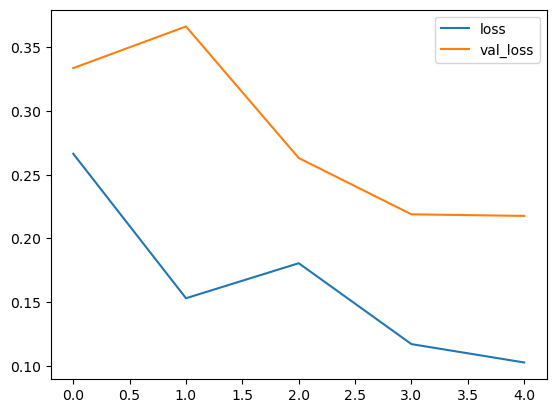

In [8]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

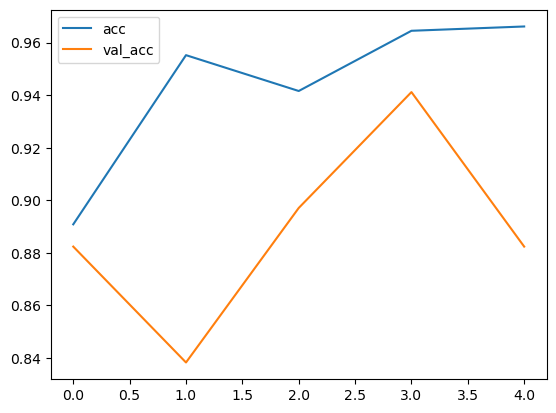

In [9]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()


In [15]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire", fontsize=30)
    elif val ==0:
        plt.xlabel("Fire", fontsize=30)

In [13]:
from sklearn.metrics import classification_report

# Predictions on test dataset
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

# Convert test labels to binary array
true_labels = np.array(test_dataset.classes)

# Compute classification report
report = classification_report(true_labels, predictions)
print(report)


3/3 [==============================] - 1s 208ms/step
              precision    recall  f1-score   support

           0       0.29      0.36      0.32        22
           1       0.65      0.57      0.60        46

    accuracy                           0.50        68
   macro avg       0.47      0.46      0.46        68
weighted avg       0.53      0.50      0.51        68



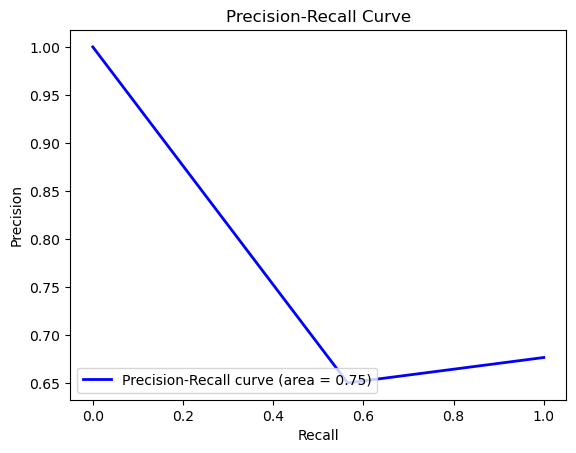

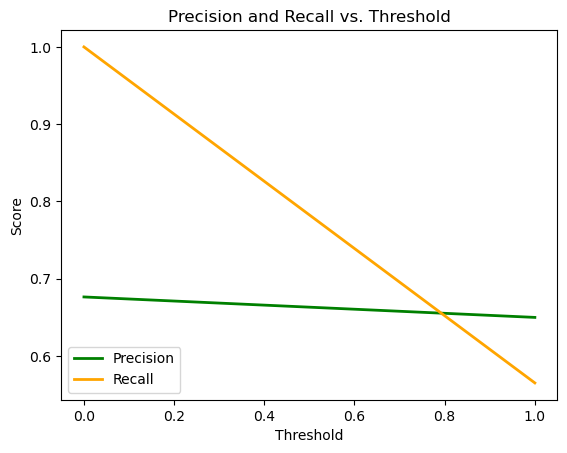

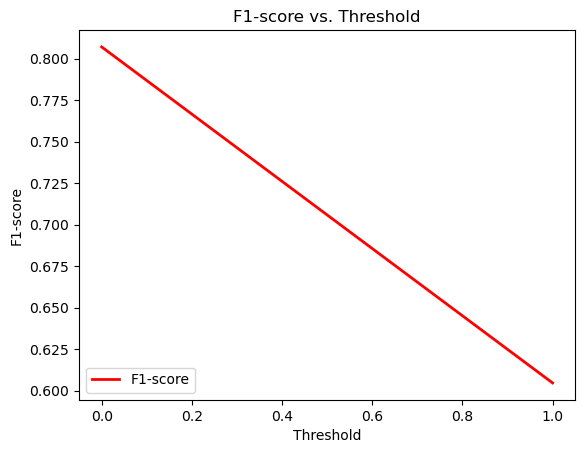

In [14]:
from sklearn.metrics import precision_recall_curve, auc

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(true_labels, predictions)

pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Plot precision and recall separately
plt.figure()
plt.plot(thresholds, precision[:-1], color='green', lw=2, label='Precision')
plt.plot(thresholds, recall[:-1], color='orange', lw=2, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold')
plt.legend(loc="lower left")
plt.show()

# Plot F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
plt.figure()
plt.plot(thresholds, f1_scores[:-1], color='red', lw=2, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs. Threshold')
plt.legend(loc="lower left")
plt.show()


1/1 [==============================] - 0s 103ms/step
[[0.]]


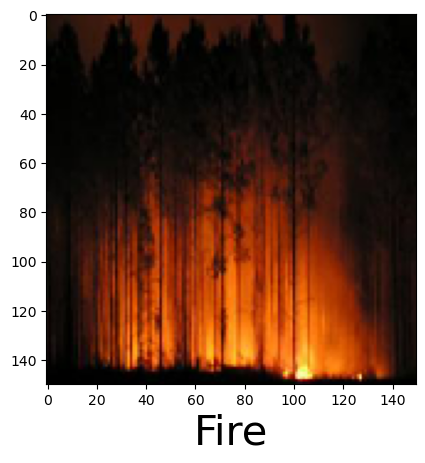

In [11]:
predictImage("/Users/meetpatel/Desktop/forest_fire/Testing/fire/abc176.jpg")

1/1 [==============================] - 0s 33ms/step
[[1.]]


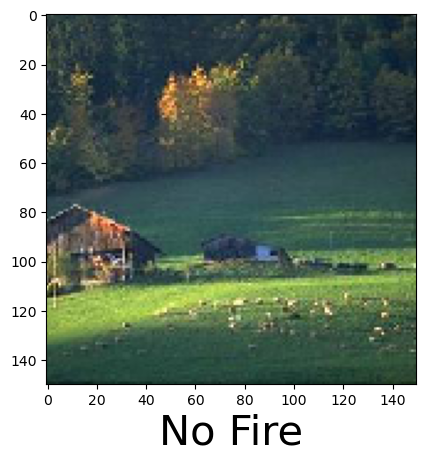

In [12]:
predictImage("/Users/meetpatel/Desktop/forest_fire/Testing/nofire/abc339.jpg")